In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline

from collections import Counter

# Load training and test sets (assumes you have these in current working directory)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# Split training set into X and y (removing first column containing IDs)
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

# Define function to compute RMSE
def scoreRMSE(predictor, X, true_y):
    predictions = predictor.predict(X)
    return np.sqrt(mean_squared_error(predictions, true_y))

from sklearn.model_selection import KFold
def kfold(k, predictor, X):
    kf = KFold(n_splits = k, random_state = 0)
    count = 0
    coeff_used = 0 
    for trains, tests in kf.split(X):
        x_train = X.iloc[trains, 1:-1]
        y_train = X.iloc[trains, -1]
        x_test = X.iloc[tests, 1:-1]
        y_test = X.iloc[tests, -1]
        predictor.fit(x_train, y_train)
        predictions = predictor.predict(x_test)
        count += np.sqrt(mean_squared_error(predictions, unit_round(y_test)))
        coeff_used += np.sum(predictor.coef_!=0)
    return count/k

def unit_round(y_array):
    for y in y_array:
        if y < 0:
            y = 0
        if y > 1:
            y = 1
    return y_array
    

TRAINING RMSE: 0.026357953023403557


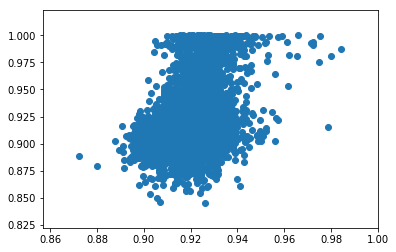

In [46]:
# ridge regression
rr = Ridge(alpha = 0.01)
rr.fit(X_train, y_train)
print "TRAINING RMSE:", scoreRMSE(rr, X_train, y_train)
prediction = rr.predict(X_train)
plt.scatter(prediction, y_train)

In [4]:
print kfold(10, Lasso(alpha = 10**-4), train)
print kfold(10, Lasso(), train)

0.02744802553565275
0.027972577683165006


In [3]:
print kfold(5, Ridge(alpha = 10**1), train)
print kfold(10, Ridge(alpha = 10**1.5), train)
print kfold(15, Ridge(alpha = 10**1.5), train)

0.02727860423989813
0.02726106067390489
0.027249426121184025


In [43]:
# what should alpha be? turns out it doesn't really matter 
print "10 folds"
for alpha in list(10**x for x in range(-12, 3, 2)):
    print alpha, kfold(10, Ridge(alpha = alpha), train)

print "======"
print "5 folds"
for alpha in list(10**x for x in range(-12, 3, 2)):
    print alpha, kfold(5, Ridge(alpha = alpha), train)

print "======"
print "15 folds"
for alpha in list(10**x for x in range(-12, 3, 2)):
    print alpha, kfold(15, Ridge(alpha = alpha), train)

10 folds
1e-10 0.13001469468026766
1e-08 0.028717990350055327
1e-06 0.027888444197912365
0.0001 0.02788759452119577
0.01 0.02785337885849116
1 0.027452928577104053
5 folds
1e-10 0.162071500156964
1e-08 0.028769355519006324
1e-06 0.028052144305038124
0.0001 0.028051229041438214
0.01 0.028002810738069726
1 0.027479992292171025
15 folds
1e-10 0.1001580835898616
1e-08 0.02855939120175371
1e-06 0.027909624113536036
0.0001 0.027908844284835883
0.01 0.027875029327060437
1 0.02745622862188565


-4
COEFF USED: 9
TRAINING RMSE: 0.027426477245999246


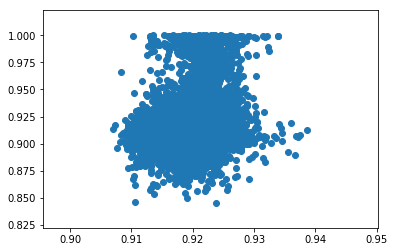

In [14]:
# lasso regression. gives everything a 0.92
for alpha in [-4]:
    lasso = Lasso(alpha = 10**alpha)
    lasso.fit(X_train,y_train)
    print alpha
    print "COEFF USED:", np.sum(lasso.coef_!=0)
    print "TRAINING RMSE:", scoreRMSE(lasso, X_train, y_train)
    prediction = lasso.predict(X_train)
plt.scatter(prediction, y_train)

In [54]:
# change values of alpha. this shit takes forever to run and doesn't even do that well
print "10 folds"
for alpha in list(10**x for x in range(-10, 3, 2)):
    print alpha, kfold(10, Lasso(alpha = alpha), train)

    

10 folds
1e-10 (0.027882633883628417, 207)
1e-08 (0.027879910462535858, 206)
1e-06 (0.0276995717839462, 182)
0.0001 (0.02744802553565275, 9)
0.01 (0.027972577683165006, 0)
1 (0.027972577683165006, 0)
100 (0.027972577683165006, 0)


In [5]:
print kfold(10, Lasso(alpha = 10**1), train)

0.027972577683165006


In [15]:
from sklearn.linear_model import ElasticNet
# need to test alpha, l1_ratio
elastic = ElasticNet(random_state = 0, alpha = 0.0001, l1_ratio = 0.3)
elastic.fit(X_train, y_train)
coeff_used = np.sum(elastic.coef_!=0)
print "TRAINING RMSE:", scoreRMSE(elastic, X_train, y_train)
print coeff_used

TRAINING RMSE: 0.027045282763387007
42


In [16]:
sum(X_train.var() > 0.001)

152

In [11]:
from sklearn.model import KFold

def kfold(k, predictor, X):
    kf = KFold(X.shape[0], k)
    count = 0
    for trains, tests in kf:
        x_train = X.iloc[trains, 1:-1]
        y_train = X.iloc[trains, -1]
        x_test = X.iloc[tests, 1:-1]
        y_test = X.iloc[tests, -1]
        predictor.fit(x_train, y_train)
        predictions = predictor.predict(x_test)
        count += np.sqrt(mean_squared_error(predictions, y_test))
    return count/k

kfold(10, Ridge(), train)

ImportError: No module named cross_validation

In [10]:
# Make predictions using linear regression model fitted above
predictions = linReg.predict(X_test)

In [11]:
# Format predictions to be compatible with Kaggle upload
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

,Id,Predicted
0,1,0.934613
1,2,0.925099
2,3,0.922504
3,4,0.934105
4,5,0.926756


In [12]:
# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("sample_submission.csv", index=False)